In [57]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import seaborn as sns
import math
import re
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [58]:
df = pd.read_csv('data/final_df.csv')

In [59]:
### Drop Columns not need for EDA ###
df = df.drop(columns=['stadium_address','stadium_weather_station_code',
                      'stadium_weather_type','STATION'])

df['over_under_result'] = np.where(df['over_under_result'] == 'Over',1,0)

df = df.dropna()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9815 entries, 0 to 9819
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        9815 non-null   object 
 1   schedule_season      9815 non-null   int64  
 2   schedule_week        9815 non-null   int64  
 3   schedule_playoff     9815 non-null   bool   
 4   team_home            9815 non-null   object 
 5   score_home           9815 non-null   float64
 6   score_away           9815 non-null   float64
 7   team_away            9815 non-null   object 
 8   team_favorite_id     9815 non-null   object 
 9   spread_favorite      9815 non-null   float64
 10  over_under_line      9815 non-null   float64
 11  stadium_neutral      9815 non-null   bool   
 12  total                9815 non-null   int64  
 13  over_under_result    9815 non-null   int64  
 14  stadium_name         9815 non-null   object 
 15  stadium_location     9815 non-null   o

## Target Variable: Over/Under Result

To start the analysis it is important to look at the class imbalance of our Target Variable (Over/Under Result). The results below show a slight class imbalance with 'Under' Outcomes overrepresented by roughly 2%, or 141 observations. 

In [55]:
### Percentages of Classes ###
print("Total 'Under' Outcomes")
print(df.over_under_result.value_counts()[0])
print("Total 'Over' Outcomes")
print(df.over_under_result.value_counts()[1])
print('----------------------------------------')
print("Percent 'Under' Outcomes")
print(round((df.groupby(['over_under_result']).over_under_result.count()[0]/
       df.groupby(['over_under_result']).over_under_result.count().sum()),2))
print("Percent 'Over' Outcomes")
print(round((df.groupby(['over_under_result']).over_under_result.count()[1]/
       df.groupby(['over_under_result']).over_under_result.count().sum()),2))


Total 'Under' Outcomes
4978
Total 'Over' Outcomes
4837
----------------------------------------
Percent 'Under' Outcomes
0.51
Percent 'Over' Outcomes
0.49


The plot below titled "Total NFL Game Over/Unders" can help us visualize the class imbalance with our Target Variable. We can see that the imbalance is relatively small and not an immediate issue. 

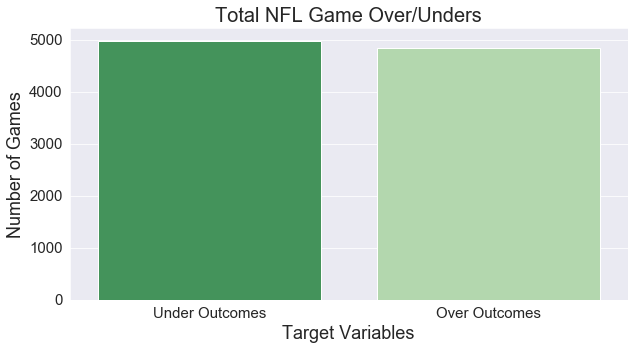

In [56]:
plt.figure(figsize = (10,5))
sns.set_style("darkgrid")
sns.countplot(df['over_under_result'], palette="Greens_r")
plt.title('Total NFL Game Over/Unders',fontsize = 20)
plt.ylabel('Number of Games',fontsize = 18)
plt.xlabel('Target Variables',fontsize = 18)
plt.yticks(fontsize = 15)
plt.xticks(np.arange(2), ['Under Outcomes','Over Outcomes'],fontsize = 15)
plt.show()

To start the EDA on the rest of the dataset I decided to break the features into four categories; Setting Data, Betting Data, Team Data, and Weather Data. 

# Setting Data EDA

To start we look at the Setting Data. These features consists of all features pertaining to the time and place that a given game was played.

### Season

1979 to 2020

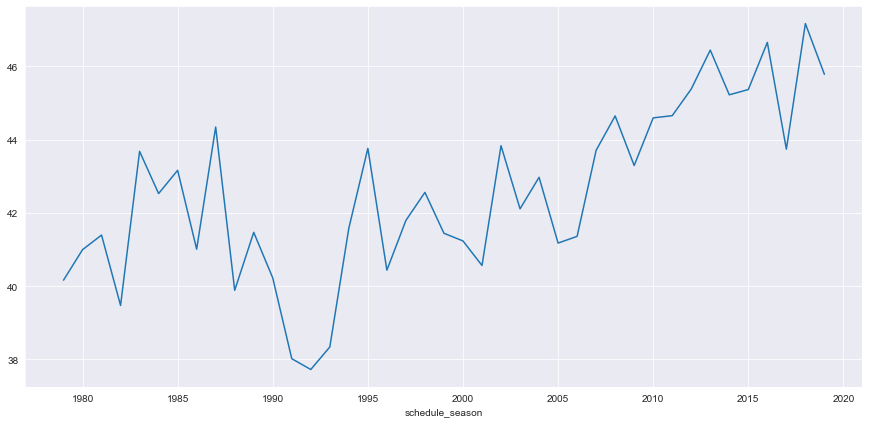

In [7]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['schedule_season'])['total'].mean().plot(ax=ax)

### Schedule Week

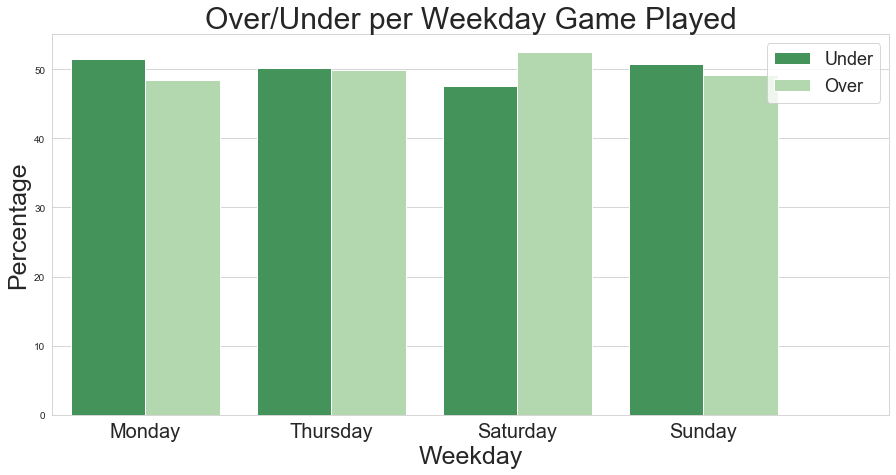

In [8]:
### Build Dataset that Groups by Week and Over Result, then get Percentage Over or Under ###
weekday_percent = (df.groupby(['weekday'])['over_under_result'].value_counts(normalize=True)
                     .rename('percentage').mul(100).reset_index().sort_values('over_under_result'))

### Get Rid of Monday and Tuesday because not enough games are played on those day ###
weekday_percent = weekday_percent[(weekday_percent.weekday != 1) & 
                                  (weekday_percent.weekday != 2) & 
                                  (weekday_percent.weekday != 4)]

### Plot ###
plt.figure(figsize = (15,7))
sns.set_style("whitegrid")
weekday_bar = sns.barplot(x="weekday", y="percentage", hue="over_under_result", data=weekday_percent, palette='Greens_r')
weekday_bar = plt.xticks(np.arange(5), ['Monday','Thursday','Saturday','Sunday'],fontsize=20)
weekday_bar = plt.xlabel('Weekday',fontsize=25)
weekday_bar = plt.ylabel('Percentage',fontsize=25)
weekday_bar = plt.title('Over/Under per Weekday Game Played',fontsize = 30)
weekday_bar = plt.legend(fontsize=18)
weekday_bar.get_texts()[1].set_text('Over')
weekday_bar.get_texts()[0].set_text('Under')
plt.savefig('weekday_bar.png')


### Stadium Capacity

In [9]:
df.stadium_capacity.describe()

count      9815.000000
mean      68853.369638
std        8524.341404
min       27000.000000
25%       64767.000000
50%       68756.000000
75%       75000.000000
max      100000.000000
Name: stadium_capacity, dtype: float64

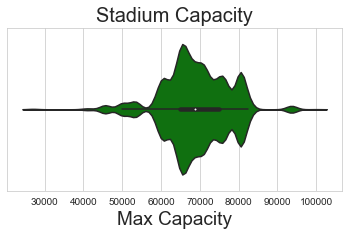

In [10]:
fig, ax = plt.subplots(figsize=(6,3))
sns.set_style("white")
#plt.figure(figsize = (6,6));
capacity_violin = sns.violinplot(x=df["stadium_capacity"],color = 'green')
capacity_violin.set_title('Stadium Capacity',fontsize=20)
capacity_violin.set_xlabel('Max Capacity',fontsize=19)
plt.savefig('capacity_violin.png')


Text(0.5, 0, 'Capacity')

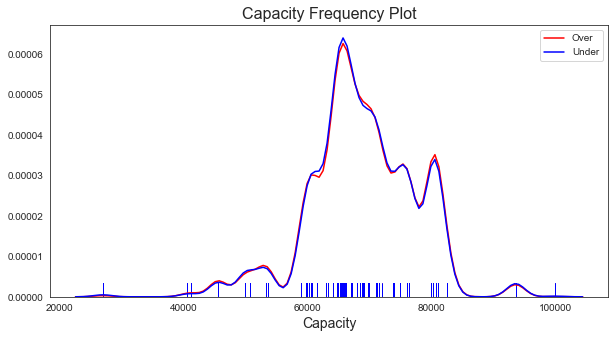

In [11]:
fig, ax = plt.subplots(figsize = (10,5));
pup = sns.distplot(df[df['over_under_result']== 1].stadium_capacity, color='red',hist=False, rug=True, label = 'Over')
pup = sns.distplot(df[df['over_under_result']== 0].stadium_capacity, color='blue',hist=False, rug=True, label = 'Under')
pup.set_title('Capacity Frequency Plot',fontsize=16)
pup.set_xlabel('Capacity',fontsize=14)



In [12]:
stadium_groups=[]
for i in df['stadium_capacity']:
    if (i < 50000):
        stadium_groups.append(0)
    elif (i >= 50000) & (i <= 85000):
        stadium_groups.append(1)
    else:
        stadium_groups.append(2)
df['stadium_group'] = stadium_groups

In [13]:
### Build Dataset that Groups by Week and Over Result, then get Percentage Over or Under ###
stadium_percent = (df.groupby(['stadium_group'])['over_under_result'].value_counts(normalize=True)
                     .rename('percentage').mul(100).reset_index().sort_values('over_under_result'))

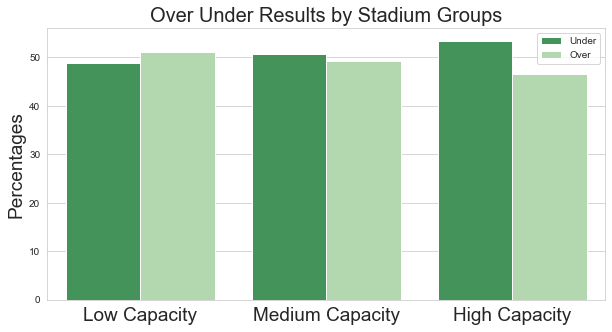

In [14]:

### Plot ###
plt.figure(figsize = (10,5))
sns.set_style("whitegrid")
stadium_bar = sns.barplot(x="stadium_group", y="percentage", hue="over_under_result", data=stadium_percent, palette='Greens_r')
stadium_bar = plt.xticks(np.arange(3), ['Low Capacity','Medium Capacity','High Capacity'],fontsize=19)
stadium_bar = plt.xlabel('',fontsize=19)
stadium_bar = plt.ylabel('Percentages',fontsize=19)
stadium_bar = plt.title('Over Under Results by Stadium Groups',fontsize = 20)
stadium_bar = plt.legend()
stadium_bar.get_texts()[1].set_text('Over')
stadium_bar.get_texts()[0].set_text('Under')
plt.savefig('stadium_bar.png')


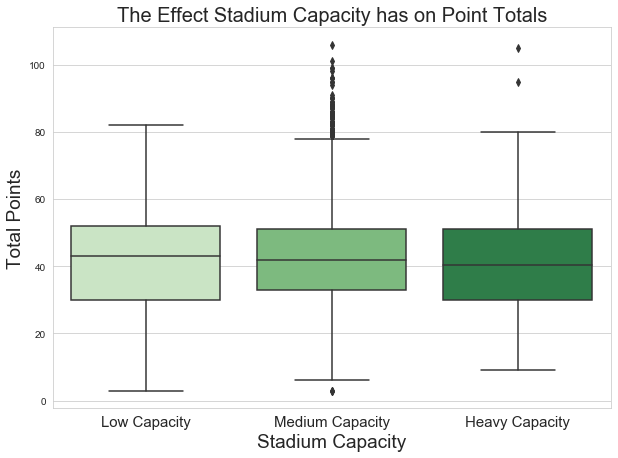

In [15]:
plt.figure(figsize = (10,7));
stadium_box = sns.boxplot(x = 'stadium_group', y = 'total', data = df, palette="Greens")
stadium_box.set_title('The Effect Stadium Capacity has on Point Totals',fontsize=20)
stadium_box.set_ylabel('Total Points',fontsize=19)
stadium_box.set_xlabel('Stadium Capacity',fontsize=19)
stadium_box.set_xticklabels(['Low Capacity','Medium Capacity','Heavy Capacity'],fontsize=15)
plt.show()

### Distance Traveled

In [16]:
df.dist_diff.describe()

count    9815.000000
mean     1573.042629
std      1044.883865
min         0.000000
25%       727.516570
50%      1376.466007
75%      2149.236453
max      4390.866941
Name: dist_diff, dtype: float64

Text(0.5, 0, 'Distance Traveled')

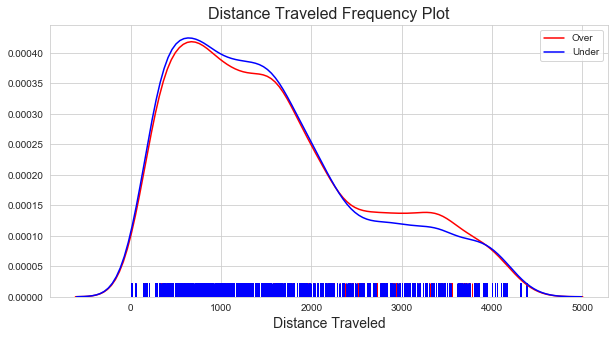

In [17]:
fig, ax = plt.subplots(figsize = (10,5));
pup = sns.distplot(df[df['over_under_result']== 1].dist_diff, color='red',hist=False, rug=True, label = 'Over')
pup = sns.distplot(df[df['over_under_result']== 0].dist_diff, color='blue',hist=False, rug=True, label = 'Under')
pup.set_title('Distance Traveled Frequency Plot',fontsize=16)
pup.set_xlabel('Distance Traveled',fontsize=14)


# Betting Data EDA

### Spread

In [18]:
spread_percent = (df.groupby(['spread_favorite'])['over_under_result'].value_counts(normalize=True)
                     .rename('percentage').mul(100).reset_index().sort_values('over_under_result'))

### Spread 17.5 and above sample too small ###
spread_percent = spread_percent[(spread_percent.spread_favorite < 15)]

In [19]:
#spread = df.groupby(['spread_favorite']).over_under_line.count()
#spread

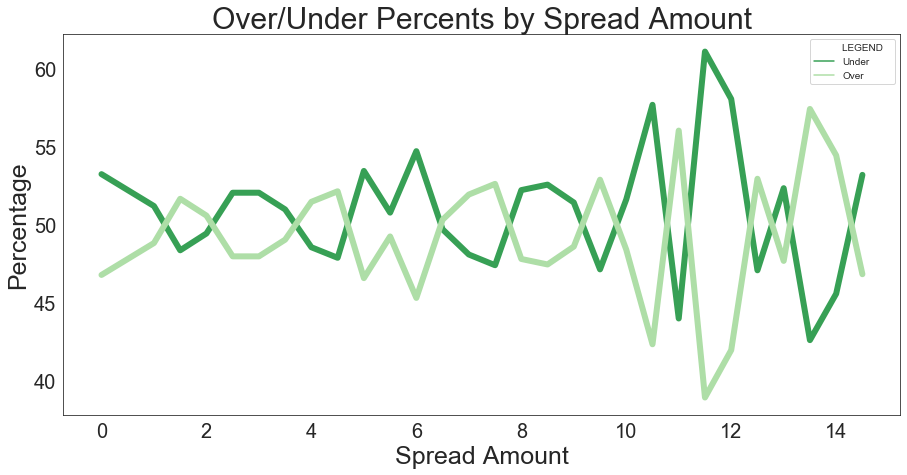

In [20]:
plt.figure(figsize = (15,7))
sns.set_style("white")
spread_line = sns.lineplot(x="spread_favorite", y="percentage", hue="over_under_result", 
                           data=spread_percent, palette='Greens_r',linewidth = 6)
spread_line = plt.title('Over/Under Percents by Spread Amount',fontsize = 30)
spread_line = plt.xticks(fontsize=20)
spread_line = plt.yticks(fontsize=20)
spread_line = plt.xlabel('Spread Amount',fontsize=25)
spread_line = plt.ylabel('Percentage',fontsize=25)
spread_line = plt.legend()
spread_legend = plt.legend()
spread_legend.get_texts()[2].set_text('Over')
spread_legend.get_texts()[1].set_text('Under')
spread_legend.get_texts()[0].set_text('LEGEND   ')
plt.savefig('spread_plot.png')
### No Real Relationship, But as the number gets bigger the percentages start to increase ###


# Team Statistics Data EDA

### Team Previous Season Data

In [21]:
season_data = df.drop(columns=['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff',
       'score_home', 'score_away',
       'team_favorite_id', 'spread_favorite', 'over_under_line',
       'stadium_neutral','total','LATITUDE', 'LONGITUDE', 'unix', 'time', 'summary', 'icon',
       'precipIntensity', 'precipProbability', 'precipType', 'temperature',
       'apparentTemperature', 'dewPoint', 'humidity', 'pressure', 'windSpeed',
       'windBearing', 'cloudCover', 'uvIndex', 'visibility', 'elevation',
       'stadium_group',
       'over_under_result', 'stadium_name', 'stadium_location', 'stadium_open',
       'stadium_type', 'stadium_capacity', 'stadium_surface', 'LATITUDE',
       'LONGITUDE', 'zipcode', 'zipcode_away', 'dist_diff', 'weekday',
        'home_OSRS','home_MoV','home_PD','away_OSRS','away_MoV','away_PD',
        'away_DSRS','away_SRS','home_DSRS','home_SRS','diff_MoV','diff_SRS','diff_OSRS'] )

In [22]:
df.columns

Index(['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff',
       'team_home', 'score_home', 'score_away', 'team_away',
       'team_favorite_id', 'spread_favorite', 'over_under_line',
       'stadium_neutral', 'total', 'over_under_result', 'stadium_name',
       'stadium_location', 'stadium_open', 'stadium_type', 'stadium_capacity',
       'stadium_surface', 'zipcode', 'weekday', 'zipcode_away', 'dist_diff',
       'home_W-L%', 'home_PD', 'home_MoV', 'home_SoS', 'home_SRS', 'home_OSRS',
       'home_DSRS', 'home_PF_per_game', 'home_PA_per_game', 'away_W-L%',
       'away_PD', 'away_MoV', 'away_SoS', 'away_SRS', 'away_OSRS', 'away_DSRS',
       'away_PF_per_game', 'away_PA_per_game', 'home_superbowl_odds',
       'away_superbowl_odds', 'diff_W-L%', 'diff_PD', 'diff_MoV', 'diff_SoS',
       'diff_SRS', 'diff_OSRS', 'diff_PF_per_game', 'diff_PA_per_game',
       'diff_superbowl_odds', 'LATITUDE', 'LONGITUDE', 'unix', 'time',
       'summary', 'icon', 'precipIntensity

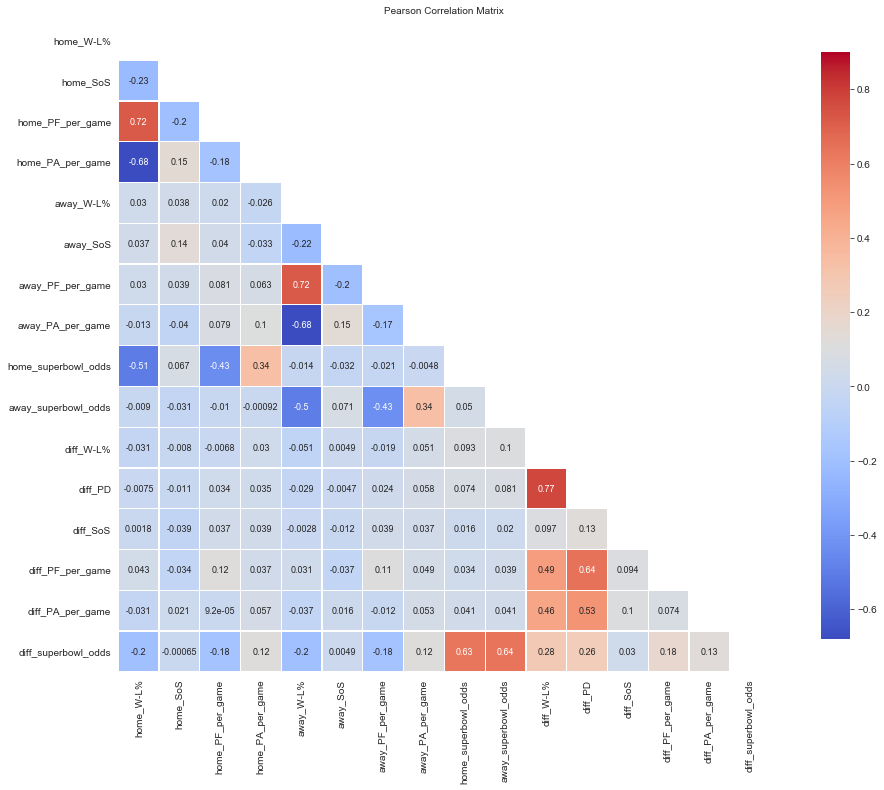

In [23]:
# Plot Correlation to Visualize Multi-Collinearity

mask = np.zeros_like(season_data.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(18, 12))
plt.title('Pearson Correlation Matrix',fontsize=10)

sns.heatmap(season_data.corr(),linewidths=0.25,vmax=0.9,square=True,cmap="coolwarm",
            linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});
plt.show()

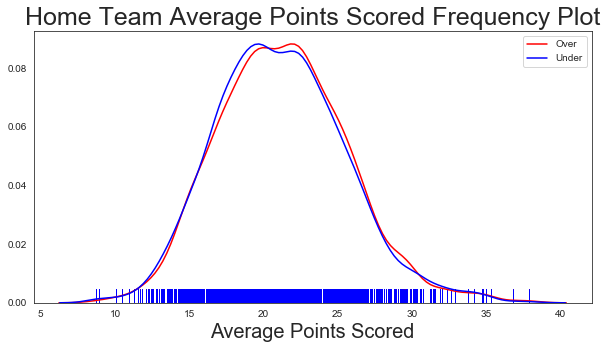

In [24]:
fig, ax = plt.subplots(figsize = (10,5));
sns.set_style('white')
home_freq = sns.distplot(df[df['over_under_result']== 1].home_PF_per_game, color='red',hist=False, rug=True, label = 'Over')
home_freq = sns.distplot(df[df['over_under_result']== 0].home_PF_per_game, color='blue',hist=False, rug=True, label = 'Under')
home_freq.set_title('Home Team Average Points Scored Frequency Plot',fontsize=25)
home_freq.set_xlabel('Average Points Scored',fontsize=20)
plt.savefig('home_freq.png')


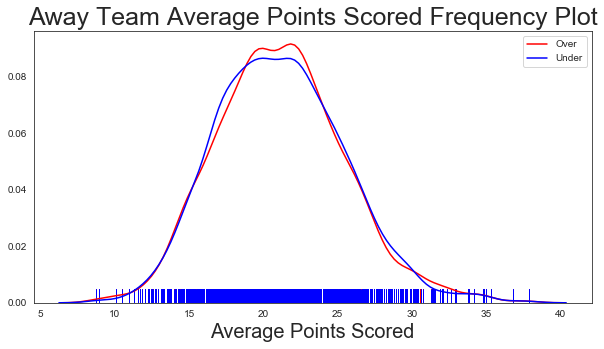

In [25]:
fig, ax = plt.subplots(figsize = (10,5));
sns.set_style('white')
away_freq = sns.distplot(df[df['over_under_result']== 1].away_PF_per_game, color='red',hist=False, rug=True, label = 'Over')
away_freq = sns.distplot(df[df['over_under_result']== 0].away_PF_per_game, color='blue',hist=False, rug=True, label = 'Under')
away_freq.set_title('Away Team Average Points Scored Frequency Plot',fontsize=25)
away_freq.set_xlabel('Average Points Scored',fontsize=20)
plt.savefig('away_freq.png')


### Superbowl Odds 

In [26]:
df.diff_superbowl_odds.describe()

count     9815.000000
mean      5431.957718
std       9151.539388
min          0.000000
25%       1000.000000
50%       2900.000000
75%       6200.000000
max      99760.000000
Name: diff_superbowl_odds, dtype: float64

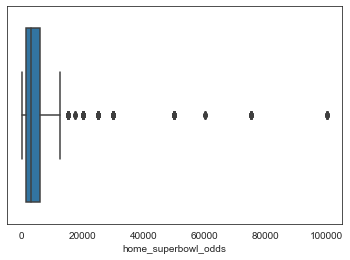

In [27]:
sns.boxplot(df.home_superbowl_odds)

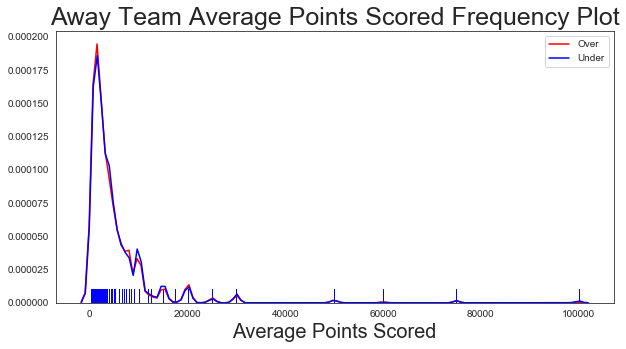

In [28]:
fig, ax = plt.subplots(figsize = (10,5));
sns.set_style('white')
away_freq = sns.distplot(df[df['over_under_result']== 1].home_superbowl_odds, color='red',hist=False, rug=True, label = 'Over')
away_freq = sns.distplot(df[df['over_under_result']== 0].home_superbowl_odds, color='blue',hist=False, rug=True, label = 'Under')
away_freq.set_title('Away Team Average Points Scored Frequency Plot',fontsize=25)
away_freq.set_xlabel('Average Points Scored',fontsize=20)
plt.savefig('away_freq.png')

# Weather Data EDA

In [29]:
weather_df = df.drop(columns = ['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff',
       'team_home', 'score_home', 'score_away', 'team_away',
       'team_favorite_id', 'spread_favorite', 'over_under_line',
       'stadium_neutral', 'total', 'over_under_result', 'stadium_name',
       'stadium_location', 'stadium_open', 'stadium_type',
       'stadium_capacity', 'stadium_surface','stadium_group',
       'zipcode', 'weekday', 'zipcode_away', 'dist_diff', 'home_W-L%',
       'home_PD', 'home_MoV', 'home_SoS', 'home_SRS', 'home_OSRS', 'home_DSRS',
       'home_PF_per_game', 'home_PA_per_game', 'away_W-L%', 'away_PD',
       'away_MoV', 'away_SoS', 'away_SRS', 'away_OSRS', 'away_DSRS',
       'away_PF_per_game', 'away_PA_per_game', 'home_superbowl_odds',
       'away_superbowl_odds', 'diff_W-L%', 'diff_PD', 'diff_MoV', 'diff_SoS',
       'diff_SRS', 'diff_OSRS', 'diff_PF_per_game', 'diff_PA_per_game',
       'diff_superbowl_odds', 'LATITUDE', 'LONGITUDE', 'unix', 'time','summary','icon','precipProbability','apparentTemperature'])

In [30]:
weather_df

,precipIntensity,precipType,temperature,dewPoint,humidity,pressure,windSpeed,windBearing,cloudCover,uvIndex,visibility,elevation
0,0.0118,1.00,84.84,75.51,0.74,1012.0,13.37,91.0,0.99,2.0,5.556,10.61
1,0.0000,0.00,82.36,55.11,0.39,1010.5,10.52,216.0,0.39,7.0,4.361,62.80
2,0.0000,0.00,75.37,57.02,0.53,1012.0,13.88,320.0,0.63,3.0,10.000,217.40
3,0.0000,0.00,78.15,71.44,0.80,1011.5,2.61,90.0,0.93,3.0,7.002,-0.01
4,0.0000,0.00,78.83,72.63,0.81,1015.4,11.76,162.0,0.79,2.0,7.921,19.09
...,...,...,...,...,...,...,...,...,...,...,...,...
9815,0.0021,0.02,22.82,17.35,0.79,1027.0,4.01,74.0,0.77,0.0,10.000,181.80
9816,0.0005,0.01,30.79,28.45,0.91,1018.1,8.08,147.0,0.66,1.0,10.000,283.04
9817,0.0006,0.01,54.49,40.38,0.59,1019.0,3.06,25.0,0.87,2.0,10.000,6.40
9818,0.0000,0.00,18.50,6.87,0.60,1037.2,9.55,327.0,0.00,1.0,10.000,283.04


### Weather Correlation

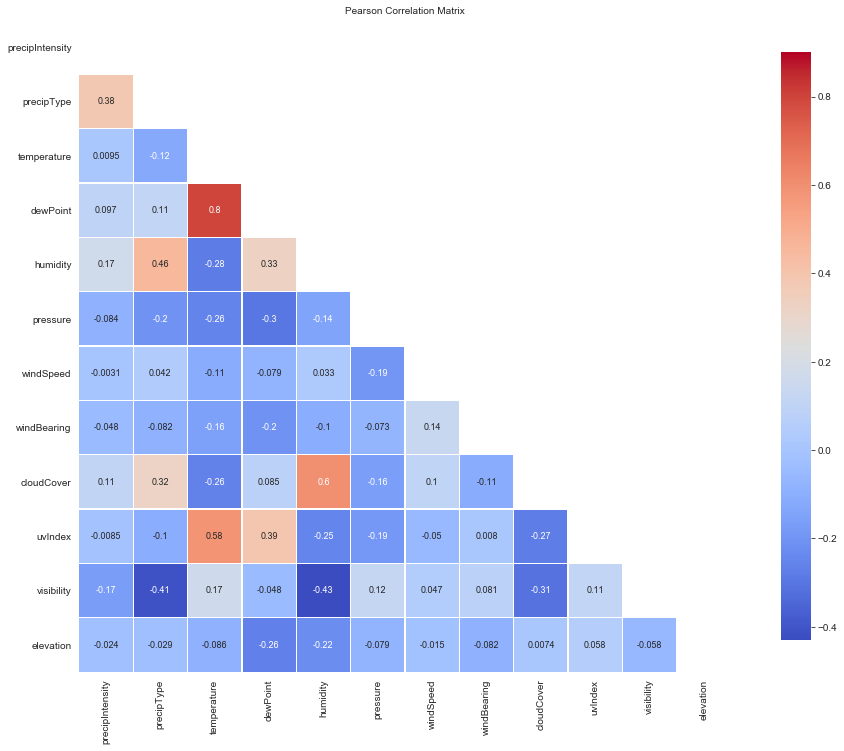

In [31]:
mask = np.zeros_like(weather_df.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(18, 12))
plt.title('Pearson Correlation Matrix',fontsize=10)

sns.heatmap(weather_df.corr(),linewidths=0.25,vmax=0.9,square=True,cmap="coolwarm",
            linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});
plt.show()

### Wind Mile per Hour

In [32]:
df.windSpeed.describe()

count    9815.000000
mean        8.025455
std         4.775098
min         0.000000
25%         4.580000
50%         7.260000
75%        10.760000
max        39.020000
Name: windSpeed, dtype: float64

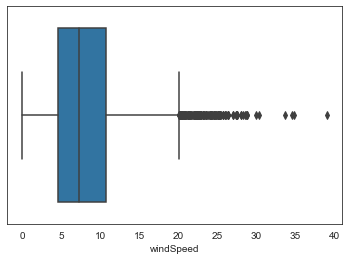

In [33]:
sns.boxplot(df.windSpeed)

In [55]:
df['windSpeed'] = df['windSpeed'].apply(np.floor)

wind_percent = (df.groupby(['windSpeed'])['over_under_result'].value_counts(normalize=True)
                     .rename('percentage').mul(100).reset_index().sort_values('over_under_result'))

### Spread 17.5 and above sample too small ###
#wind_percent['windSpeed'] = np.where(wind_percent['windSpeed'] >= 21,21,wind_percent['windSpeed'])



In [56]:
df['windSpeed'].unique()

array([13., 10.,  2., 11.,  5., 15.,  9.,  4., 12.,  7.,  6., 16.,  8.,
       18., 19., 14.,  3., 22., 17., 25.,  1., 20., 24.,  0., 27., 23.,
       26., 21., 28., 30., 33., 39., 34.])

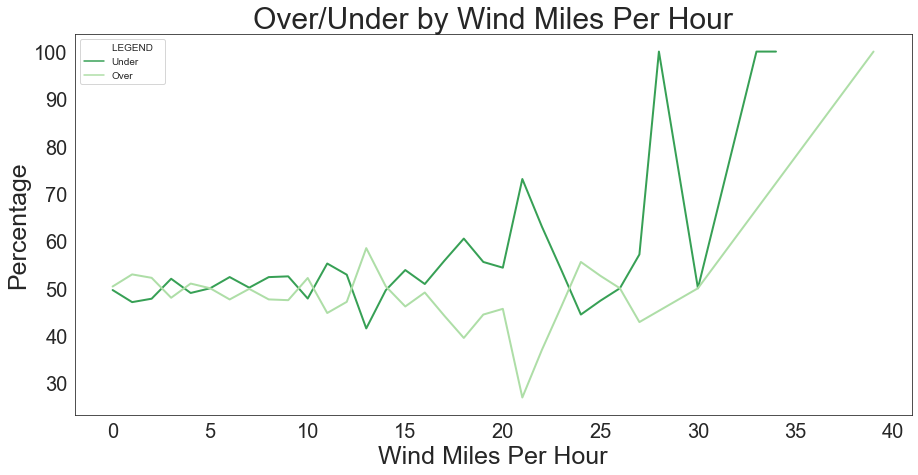

In [57]:
plt.figure(figsize = (15,7))
sns.set_style("white")
wind_plot = sns.lineplot(x="windSpeed", y="percentage", hue="over_under_result", 
                         data=wind_percent, palette='Greens_r',linewidth = 2)
wind_plot = plt.title('Over/Under by Wind Miles Per Hour',fontsize = 30)
wind_plot = plt.xticks(fontsize=20)
wind_plot = plt.yticks(fontsize=20)
wind_plot = plt.xlabel('Wind Miles Per Hour',fontsize=25)
wind_plot = plt.ylabel('Percentage',fontsize=25)
wind_plot = plt.legend()
wind_legend = plt.legend()
wind_legend.get_texts()[2].set_text('Over')
wind_legend.get_texts()[1].set_text('Under')
wind_legend.get_texts()[0].set_text('LEGEND   ')
#plt.savefig('wind_plot.png')



In [38]:
wind_groups=[]
for i in df['windSpeed']:
    if (i < 14):
        wind_groups.append(0)
    elif (i >= 14) & (i <= 21):
        wind_groups.append(1)
    else:
        wind_groups.append(2)
df['wind_group'] = wind_groups

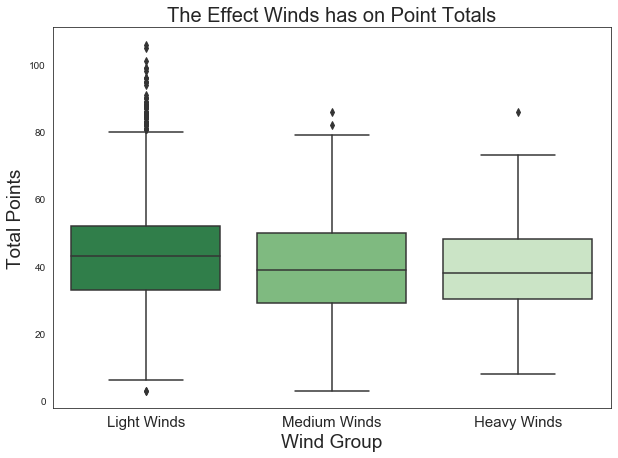

In [39]:
plt.figure(figsize = (10,7));

wind_box = sns.boxplot(x = 'wind_group', y = 'total',data = df, palette="Greens_r")
wind_box.set_title('The Effect Winds has on Point Totals',fontsize=20)
wind_box.set_ylabel('Total Points',fontsize=19)
wind_box.set_xlabel('Wind Group',fontsize=19)
wind_box.set_xticklabels(['Light Winds','Medium Winds','Heavy Winds'],fontsize=15)
plt.savefig('wind_box.png')
plt.show()

### Temperature 

In [42]:
round_temps = []
for temp in df.temperature:
    round_temps.append(round(temp))

df['round_temps'] = round_temps

In [43]:
temp_percent = (df.groupby(['round_temps'])['over_under_result'].value_counts(normalize=True)
                     .rename('percentage').mul(100).reset_index().sort_values('over_under_result'))

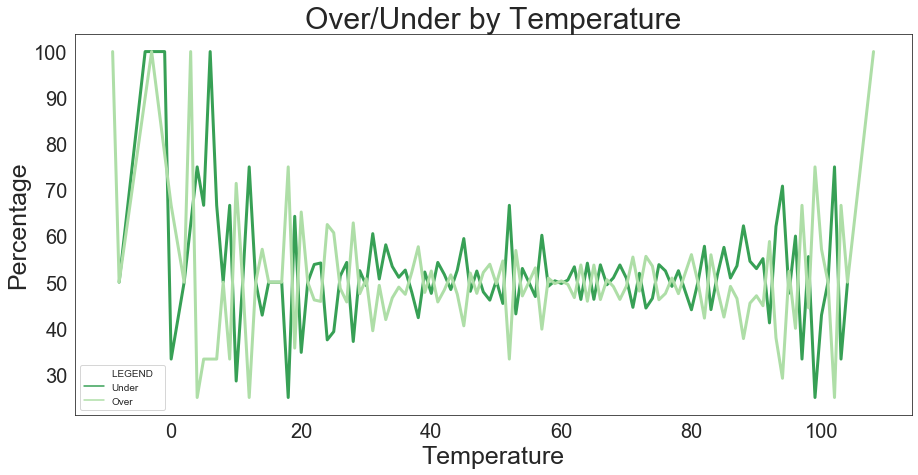

In [44]:
plt.figure(figsize = (15,7))
sns.set_style("white")
temp_plot = sns.lineplot(x="round_temps", y="percentage", hue="over_under_result", 
                         data=temp_percent, palette='Greens_r',linewidth = 3)
temp_plot = plt.title('Over/Under by Temperature',fontsize = 30)
temp_plot = plt.xticks(fontsize=20)
temp_plot = plt.yticks(fontsize=20)
temp_plot = plt.xlabel('Temperature',fontsize=25)
temp_plot = plt.ylabel('Percentage',fontsize=25)
temp_plot = plt.legend()
temp_legend = plt.legend()
temp_legend.get_texts()[2].set_text('Over')
temp_legend.get_texts()[1].set_text('Under')
temp_legend.get_texts()[0].set_text('LEGEND   ')
plt.savefig('temp_plot.png')

Text(0.5, 0, 'Temperature')

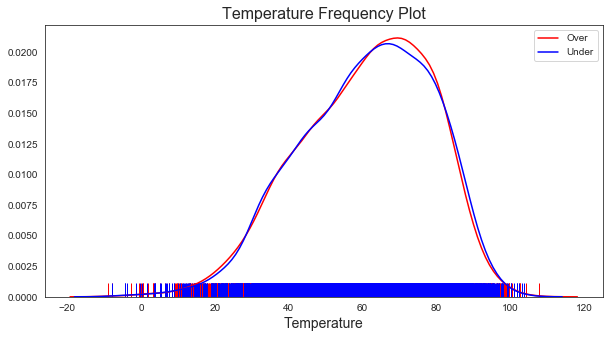

In [46]:
fig, ax = plt.subplots(figsize = (10,5));
pup = sns.distplot(df[df['over_under_result']== 1].temperature, color='red',hist=False, rug=True, label = 'Over')
pup = sns.distplot(df[df['over_under_result']== 0].temperature, color='blue',hist=False, rug=True, label = 'Under')
pup.set_title('Temperature Frequency Plot',fontsize=16)
pup.set_xlabel('Temperature',fontsize=14)


# Combining Features

### Stadium Capacity and Wind

In [49]:
stadium_wind = df[(df.windSpeed > 60000) & (df.windSpeed > 14)]
print(stadium_wind.shape)
stadium_wind = stadium_wind['over_under_result'].value_counts(normalize=True).mul(100)
stadium_wind


(0, 76)


Series([], Name: over_under_result, dtype: float64)

In [50]:
df['stadium_wind'] = np.where((df['stadium_capacity'] > 60000) & (df['windSpeed'] > 14), 1, 0)

In [60]:
elevations = list(df['elevation'])